In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [22]:
def init_board(N):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X

def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                         for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters

def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu

def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))

def find_centers(X, K):
    # Initialize to K random centers
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)

def change_coords(array):
    return list(map(list, zip(*array)))

def parse_output(data, axs):
    clusters = data[1]
    points1 = change_coords(clusters[0])
    axs.plot(points1[0], points1[1], 'ro')
    points2 = change_coords(clusters[1])
    axs.plot(points2[0], points2[1], 'g^')
    points3 = change_coords(clusters[2])
    axs.plot(points3[0], points3[1], 'ys')
    centroids = change_coords(data[0])
    axs.plot(centroids[0], centroids[1], 'kx')
    axs.axis([-1.0, 1, -1.0, 1])
    # axs.show()

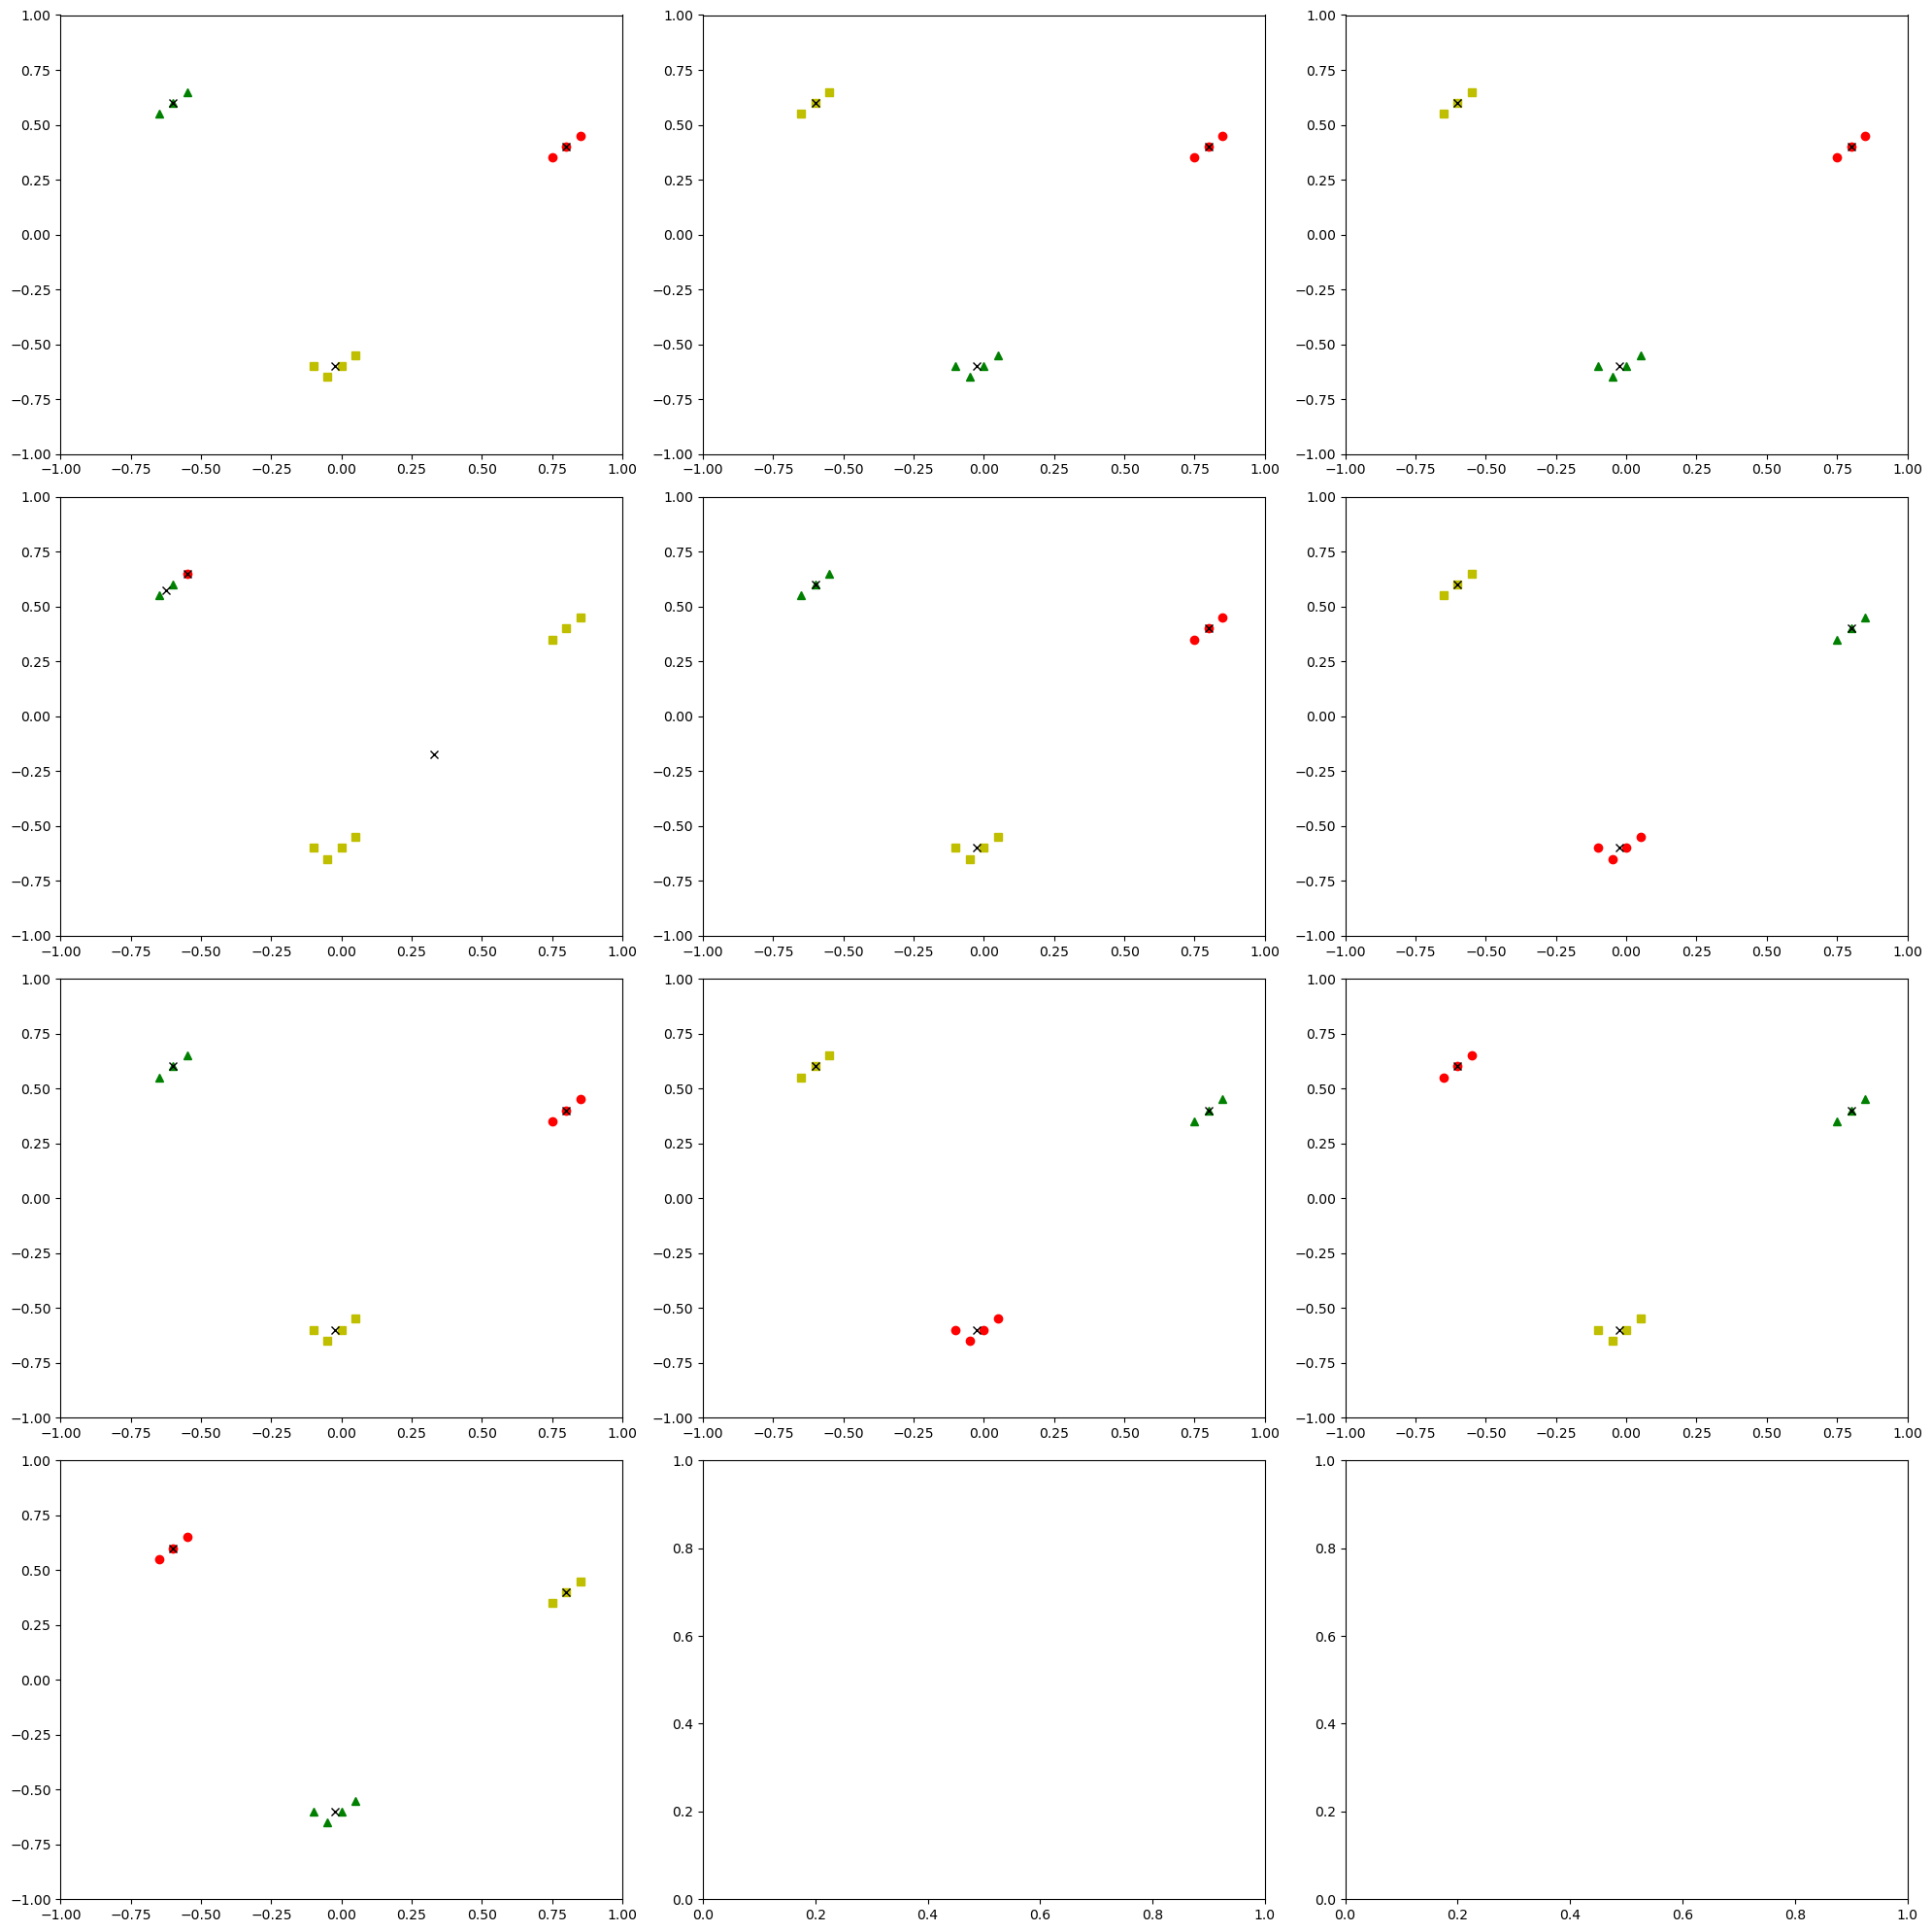

In [34]:
# data = init_board(15)
data = np.array([
    [0.8, 0.4], [0.85, 0.45], [0.75, 0.35],       # Cluster 1
    [-0.6, 0.6], [-0.55, 0.65], [-0.65, 0.55],    # Cluster 2
    [0, -0.6], [0.05, -0.55], [-0.05, -0.65], [-0.1, -0.6]  # Cluster 3
])

fig, axs = plt.subplots(4, 3, figsize=(20, 20))
axs = axs.ravel()  # Flatten the array of Axes for easy iteration

# Plot each output in a separate subplot
for i in range(10):
    out = find_centers(list(data), 3)
    parse_output(out, axs[i])

plt.tight_layout()
plt.show()